In [ ]:
#try:
#  %tensorflow_version 2.x 
#  except Exception:
#    pass

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
vgg = tf.keras.applications.VGG16(
    input_shape=[100, 100, 3], include_top=False, weights='imagenet'
)

In [ ]:
x = Flatten()(vgg.output)
x = Dense(4, activation='sigmoid')(x)
model = Model(vgg.input, x)

In [ ]:
def image_generator(batch_size=10):
  while True:
      X = np.zeros((batch_size, 100, 100, 3))
      Y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        row0 = np.random.randint(90)
        col0 = np.random.randint(90)
        row1 = np.random.randint(row0, 100)
        col1 = np.random.randint(col0, 100)

        X[i, row0:row1, col0:col1, :] = 1
        Y[i, 0] = row0 / 100.0
        Y[i, 1] = col0 / 100.0
        Y[i, 2] = (row1 - row0) / 100.0
        Y[i, 3] = (col1 - col0) / 100.0

      yield X, Y

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001))

In [ ]:
model.fit(
    image_generator(),
    steps_per_epoch=50,
    epochs=10
)

Epoch 1/10
50/50 [==============================] - 5s 106ms/step - loss: 0.9699
Epoch 2/10
50/50 [==============================] - 5s 107ms/step - loss: 0.5544
Epoch 3/10
50/50 [==============================] - 5s 107ms/step - loss: 0.5226
Epoch 4/10
50/50 [==============================] - 5s 107ms/step - loss: 0.5180
Epoch 5/10
50/50 [==============================] - 5s 107ms/step - loss: 0.5202
Epoch 6/10
50/50 [==============================] - 5s 107ms/step - loss: 0.5067
Epoch 7/10
50/50 [==============================] - 5s 107ms/step - loss: 0.5139
Epoch 8/10
50/50 [==============================] - 5s 107ms/step - loss: 0.5086
Epoch 9/10
50/50 [==============================] - 5s 106ms/step - loss: 0.5026
Epoch 10/10
50/50 [==============================] - 5s 106ms/step - loss: 0.5110


In [ ]:
from matplotlib.patches import Rectangle

def make_prediction(model):
  x = np.zeros((100, 100, 3))
  row0 = np.random.randint(90)
  col0 = np.random.randint(90)
  row1 = np.random.randint(row0, 100)
  col1 = np.random.randint(col0, 100)

  x[row0:row1, col0:col1, :] = 1
  print(row0, col0, row1, col1)

  # Predict
  X = np.expand_dims(x, 0)
  p = model.predict(X)[0]
  
  # Draw the box
  fig, ax = plt.subplots(1)
  ax.imshow(x)
  rect = Rectangle(
      (p[1]*100, p[0]*100),
      p[3]*100, p[2]*100, linewidth=1, edgecolor='r', facecolor='none'
  )
  ax.add_patch(rect)
  plt.show()

52 9 83 23


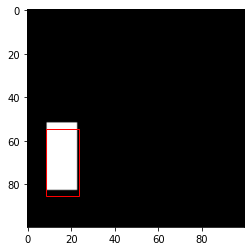

In [ ]:
make_prediction(model)